In [ ]:
# "Data Mining" course Project
# Dimensionality reduction for Spotify music data

# Group 3:
# Athanasios Karampalis
# Reinis Sestakovskis
# Onur Yuksel

# 2022

In [1]:
# PIP INSTALLS:

%pip install numpy
%pip install pandas
%pip install seaborn
%pip install sklearn
%pip install kneed
%pip install umap-learn
# ...

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# IMPORTS

import numpy as np
import pandas as pd
import seaborn as sns
import umap

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, pipeline, cluster

from matplotlib import cm, colorbar
from matplotlib.lines import Line2D
from matplotlib import style

from umap.umap_ import UMAP

from kneed import KneeLocator

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# DATA PREPARATION
df = pd.read_csv("data/dataset.csv")

print(len(df))
df = df.dropna()
print(len(df))

df.head()


16269
16268


,Unnamed: 0,id_x,track.artists,track.name,playlist_id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track.popularity
0,0,6YIivt0G3ZUuNrM62jp9pL,AJR,Way Less Sad,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.695,0.541,2,-8.350,1,0.0460,0.00707,0.000000,0.1040,0.409,140.018,207600,4,63.0
1,4,4MTmAFWHpvB9kPMSRgLFRp,The Lumineers,WHERE WE ARE,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.573,0.507,11,-8.084,1,0.0342,0.75900,0.000001,0.3770,0.363,123.183,172800,4,64.0
2,8,6y6xhAgZjvxy5kR5rigpY3,"Alesso, Marshmello, James Bay",Chasing Stars (feat. James Bay),37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.594,0.640,10,-6.865,1,0.0330,0.01690,0.000000,0.1350,0.492,92.871,170457,4,72.0
3,12,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain't Worried,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,4,96.0
4,18,3o9kpgkIcffx0iSwxhuNI2,Em Beihold,Numb Little Bug,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.742,0.527,8,-6.892,0,0.0769,0.32700,0.000000,0.2500,0.638,84.974,169238,4,79.0


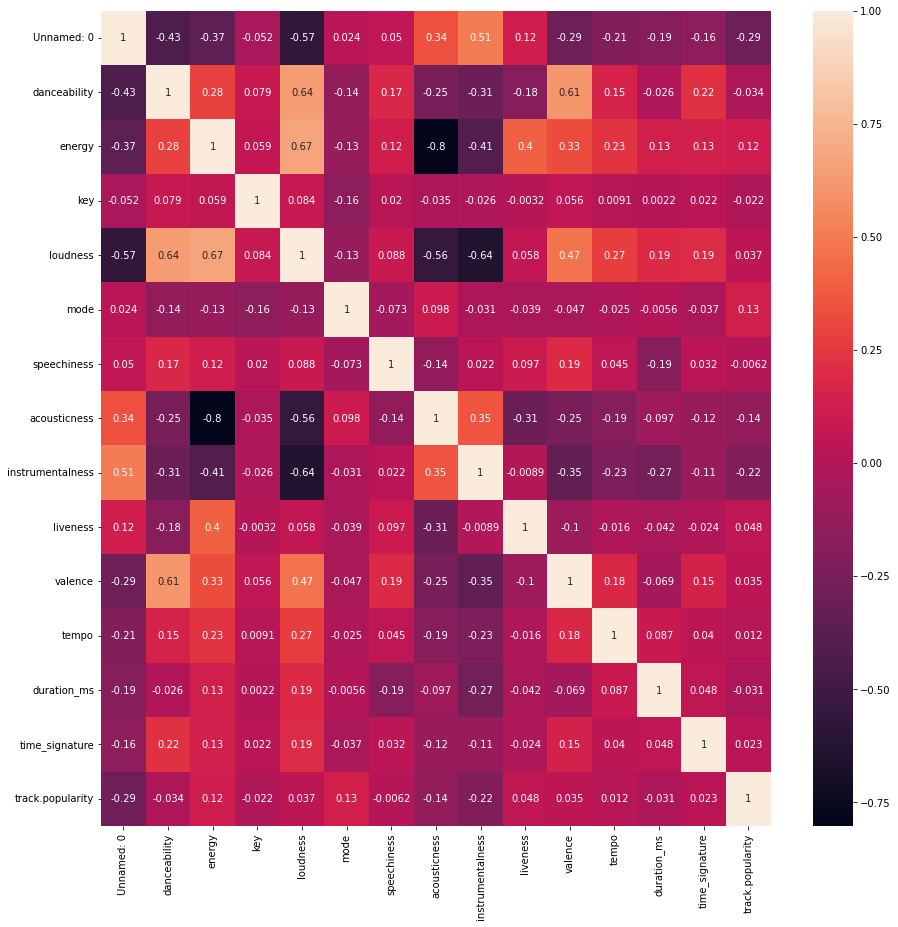

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), xticklabels= df.corr().columns, yticklabels=df.corr().columns, annot=True)
plt.show()

In [6]:
columns_to_select = [
    # "id_x",             # Track id
    # "track.artists",
    # "track.name",
    # "playlist_id",
    # "name",             # Playlist name
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
    "time_signature",
    "track.popularity"
]

playlists_to_select = [
    "Happy Hits!",
    "Rainy Day Jazz",
    "Feel Good Piano"
]

Dimensionality reduction

C:\Users\Reinis\AppData\Local\Temp/ipykernel_9948/2755641956.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_one'] = pca_result[:,0]
C:\Users\Reinis\AppData\Local\Temp/ipykernel_9948/2755641956.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_two'] = pca_result[:,1]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Explained variation per principal component: [0.25564679 0.11361892]


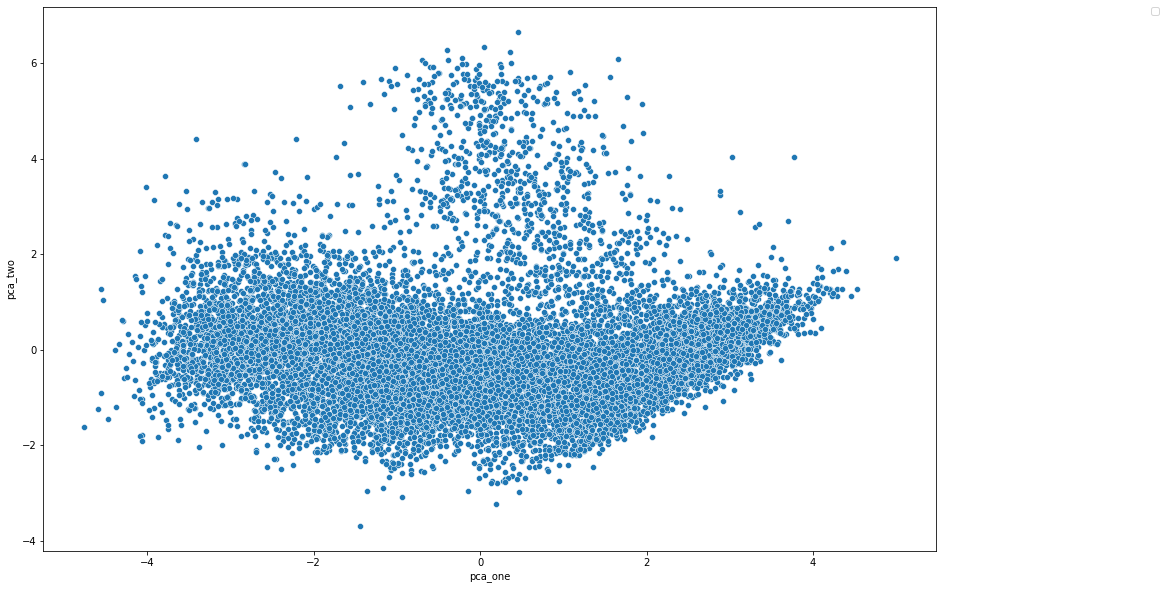

In [7]:
# PCA

# Examples:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# Filter the playlists if needed and drop duplicates
# df_filtered = df[df['name'].isin(playlists_to_select)]
df_filtered = df.drop_duplicates(subset=['id_x'])
# Uncomment below line to run the dataset without the filters
# df_filtered = df

# Scale/normalize values
scaler = StandardScaler()
X = scaler.fit_transform(df_filtered[columns_to_select])

# Perform PCA to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df_filtered['pca_one'] = pca_result[:,0]
df_filtered['pca_two'] = pca_result[:,1]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca_one', y='pca_two',
    # hue='name',
    # style='name',
    legend='full',
    data=df_filtered
)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

In [8]:
number_of_songs_to_recommend = 10
song_idx = 685
britney_features = df_filtered[['pca_one', 'pca_two']].loc[[song_idx]].values.flatten().tolist()

df_filtered['distance'] = np.linalg.norm(df_filtered[['pca_one', 'pca_two']].sub(britney_features), axis=1)
smallest_distance_indexes = df_filtered[['distance']].apply(lambda x: pd.Series(x.nsmallest(number_of_songs_to_recommend).index))
distance_array = smallest_distance_indexes[['distance']].to_numpy()
distance_array = distance_array.flatten()
df_filtered.loc[distance_array].style.background_gradient(cmap = 'Blues')

C:\Users\Reinis\AppData\Local\Temp/ipykernel_9948/1249065623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['distance'] = np.linalg.norm(df_filtered[['pca_one', 'pca_two']].sub(britney_features), axis=1)


,Unnamed: 0,id_x,track.artists,track.name,playlist_id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track.popularity,pca_one,pca_two,distance
685,1330,0a4agFmqHXxcZl1nho1BxM,Blondie,Heart Of Glass - Special Mix,37i9dQZF1DWSqmBTGDYngZ,Songs to Sing in the Shower,0.694000,0.577000,4,-14.630000,1,0.030800,0.015000,0.008360,0.085300,0.845000,114.478000,275733,4,70.000000,-2.653017,-0.287260,0.000000
3905,6278,5c33j1xFVOL4G24zxYhssB,The Isley Brothers,This Old Heart Of Mine (Is Weak For You),37i9dQZF1DX9XIFQuFvzM4,Feelin' Good,0.632000,0.590000,5,-10.206000,1,0.030500,0.346000,0.000000,0.240000,0.953000,130.287000,172733,4,66.000000,-2.633707,-0.314394,0.033303
843,1538,2AogRMqARWyUP7VQ3gmSoY,LeAnn Rimes,Can't Fight The Moonlight,37i9dQZF1DWSqmBTGDYngZ,Songs to Sing in the Shower,0.628000,0.834000,6,-6.341000,0,0.049700,0.403000,0.000000,0.051000,0.626000,97.865000,215507,4,68.000000,-2.680262,-0.324747,0.046341
11825,16795,15NvWexLBzx8l0anZ6V2Yb,Larry June,In My Pockets,37i9dQZF1DX5hR0J49CmXC,Mind Right,0.754000,0.593000,7,-6.717000,1,0.356000,0.194000,0.000001,0.210000,0.361000,91.949000,159130,4,54.000000,-2.613482,-0.335588,0.062438
11994,16968,2bIfM0ZOF4gxK1BeqH3Djm,B.B. King,Why I Sing The Blues,37i9dQZF1DXaPpS4GmGB4L,Upbeat Blues,0.792000,0.495000,0,-11.603000,1,0.052700,0.239000,0.001750,0.074000,0.719000,118.066000,517400,4,54.000000,-2.582662,-0.278704,0.070874
328,691,3LQqTJuDQm9dFt0Ajz92V3,"Flight Facilities, Channel Tres",Lights Up (feat. Channel Tres),37i9dQZF1DWSf2RDTDayIx,Happy Beats,0.787000,0.453000,10,-8.263000,0,0.079000,0.004710,0.111000,0.232000,0.513000,117.996000,191537,4,46.000000,-2.583357,-0.305316,0.071962
10866,15765,4J46hSepcjAkwAVJZMBbKM,Amo Amo,Missed Connection,37i9dQZF1DXa3NnZWk6Z3T,Café con Leche,0.636000,0.725000,9,-8.786000,0,0.030300,0.329000,0.036200,0.213000,0.816000,93.596000,231973,4,41.000000,-2.594465,-0.333314,0.074494
1112,1910,0XRYPlTCTHtaNAU1reGbB9,Moon Taxi,Say,37i9dQZF1DX2SK4ytI2KAZ,It's ALT Good!,0.553000,0.595000,9,-6.834000,1,0.054900,0.012600,0.000000,0.112000,0.619000,160.019000,189427,4,44.000000,-2.651378,-0.207254,0.080023
4027,6411,4apXjryIqMFUdOjWMM6zZp,Jean Dawson,THREE HEADS*,37i9dQZF1DX1tyCD9QhIWF,Walk Like A Badass,0.564000,0.875000,6,-4.013000,1,0.052000,0.443000,0.000158,0.078700,0.610000,139.991000,171842,4,59.000000,-2.669381,-0.208826,0.080124
1243,2074,4M6XHrTc4RtdgKN9gzEAM6,Sarah Kinsley,The King,37i9dQZF1DX0E9XMGembJo,DOPAMINE,0.631000,0.670000,6,-6.175000,1,0.052000,0.077600,0.112000,0.086000,0.746000,108.973000,206373,4,64.000000,-2.741604,-0.285254,0.088609


C:\Users\Reinis\AppData\Local\Temp/ipykernel_9948/2294693478.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = km.labels_


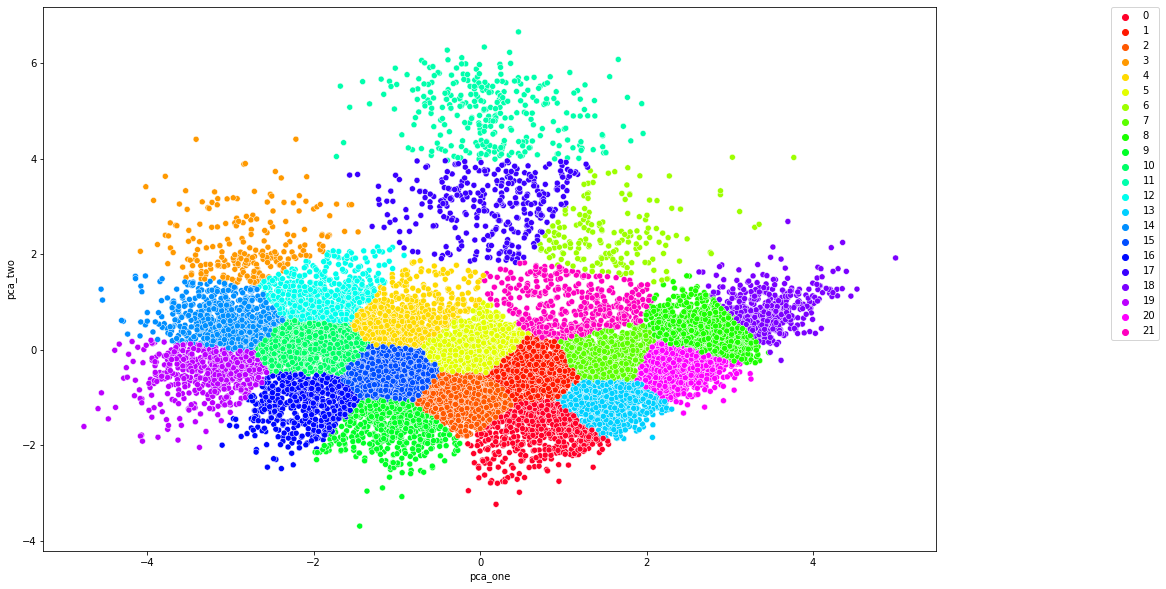

In [9]:
# Create and plot clusters

# Number of centroids
# Optimal number of clusters is 22, according to the Elbow method
K = 22
# The dataset to use
X = df_filtered[['pca_one', 'pca_two']]
# Select random observation as a centroid
km = KMeans(n_clusters=K, init='random', n_init=10, max_iter=300, tol=1e-02, random_state=0)
prediction = km.fit_predict(X)
df_filtered['cluster'] = km.labels_

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca_one', y='pca_two',
    hue='cluster',
    palette = 'gist_rainbow',
    # style='name',
    legend='full',
    data=df_filtered
)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

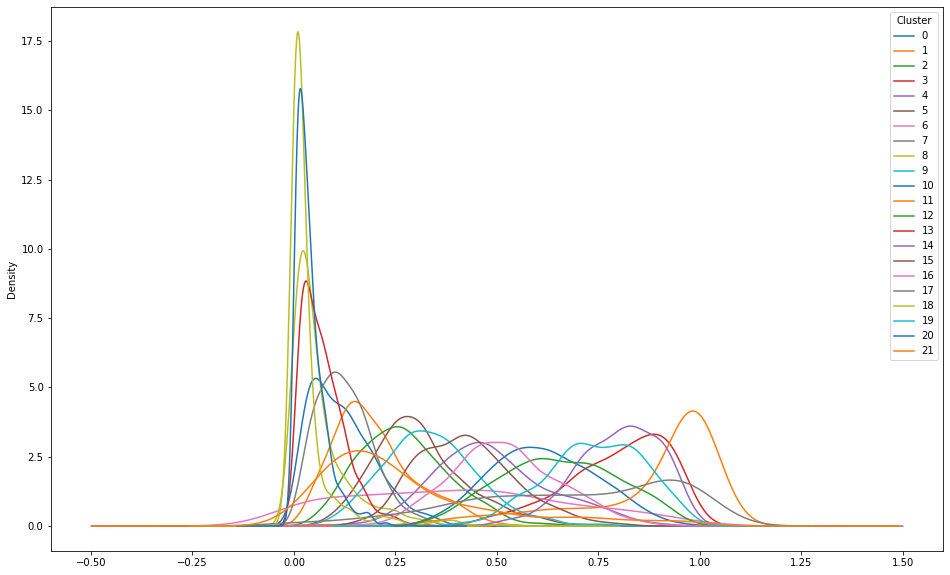

In [10]:
# Plot a density plot for the specified feature for each cluster

feature_col_name = 'energy'

fig, ax = plt.subplots(figsize=(16,10))
for cluster_idx in range(22):
  df_filtered[df_filtered['cluster'] == cluster_idx][feature_col_name].plot(kind="kde", ax=ax, label=cluster_idx)
plt.legend(title='Cluster')

C:\Users\Reinis\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Reinis\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 14538 samples in 0.020s...
[t-SNE] Computed neighbors for 14538 samples in 3.988s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14538
[t-SNE] Computed conditional probabilities for sample 2000 / 14538
[t-SNE] Computed conditional probabilities for sample 3000 / 14538
[t-SNE] Computed conditional probabilities for sample 4000 / 14538
[t-SNE] Computed conditional probabilities for sample 5000 / 14538
[t-SNE] Computed conditional probabilities for sample 6000 / 14538
[t-SNE] Computed conditional probabilities for sample 7000 / 14538
[t-SNE] Computed conditional probabilities for sample 8000 / 14538
[t-SNE] Computed conditional probabilities for sample 9000 / 14538
[t-SNE] Computed conditional probabilities for sample 10000 / 14538
[t-SNE] Computed conditional probabilities for sample 11000 / 14538
[t-SNE] Computed conditional probabilities for sample 12000 / 14538
[t-SNE] Computed conditional probabilities for sa

C:\Users\Reinis\AppData\Local\Temp/ipykernel_9948/1420581706.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tsne_2d_one'] = tsne_results[:,0]
C:\Users\Reinis\AppData\Local\Temp/ipykernel_9948/1420581706.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tsne_2d_two'] = tsne_results[:,1]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[t-SNE] KL divergence after 1000 iterations: 1.806395


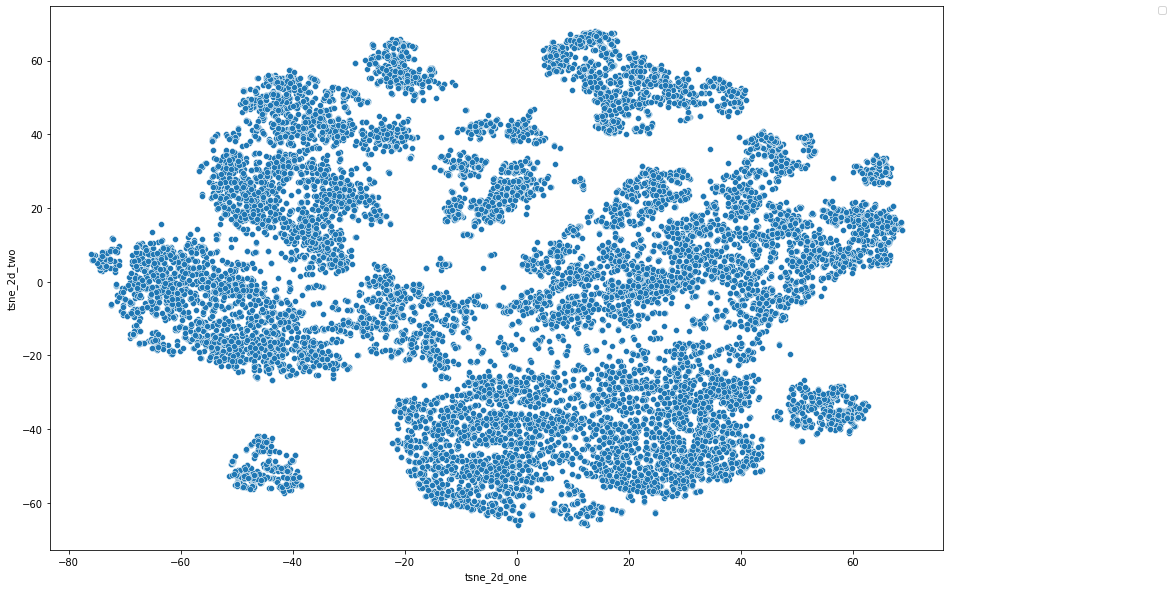

In [11]:
# t-SNE

# Examples:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# Filter the playlists if needed and drop duplicates
# df_filtered = df[df['name'].isin(playlists_to_select)]
df_filtered = df.drop_duplicates(subset=['id_x'])
# Uncomment below line to run the dataset without the filters
# df_filtered = df

# Scale/normalize values
scaler = StandardScaler()
X = scaler.fit_transform(df_filtered[columns_to_select])

# Perform t-SNE to 2 dimensions
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(X)

df_filtered['tsne_2d_one'] = tsne_results[:,0]
df_filtered['tsne_2d_two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_2d_one', y='tsne_2d_two',
    # hue='name',
    # style='name',
    legend='full',
    data=df_filtered
)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

In [13]:
number_of_songs_to_recommend = 10
song_idx = 685
britney_features = df_filtered[['tsne_2d_one', 'tsne_2d_two']].loc[[song_idx]].values.flatten().tolist()

df_filtered['distance'] = np.linalg.norm(df_filtered[['tsne_2d_one', 'tsne_2d_two']].sub(britney_features), axis=1)
smallest_distance_indexes = df_filtered[['distance']].apply(lambda x: pd.Series(x.nsmallest(number_of_songs_to_recommend).index))
distance_array = smallest_distance_indexes[['distance']].to_numpy()
distance_array = distance_array.flatten()
df_filtered.loc[distance_array].style.background_gradient(cmap = 'Blues')

C:\Users\Reinis\AppData\Local\Temp/ipykernel_9948/2258742674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['distance'] = np.linalg.norm(df_filtered[['tsne_2d_one', 'tsne_2d_two']].sub(britney_features), axis=1)


,Unnamed: 0,id_x,track.artists,track.name,playlist_id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track.popularity,tsne_2d_one,tsne_2d_two,distance
685,1330,0a4agFmqHXxcZl1nho1BxM,Blondie,Heart Of Glass - Special Mix,37i9dQZF1DWSqmBTGDYngZ,Songs to Sing in the Shower,0.694000,0.577000,4,-14.630000,1,0.030800,0.015000,0.008360,0.085300,0.845000,114.478000,275733,4,70.000000,-16.465622,-52.598976,0.000000
1636,2596,4ZoBC5MhSEzuknIgAkBaoT,Billy Joel,My Life,37i9dQZF1DX7KNKjOK0o75,Have a Great Day!,0.741000,0.647000,2,-12.878000,1,0.042700,0.108000,0.001390,0.055500,0.804000,131.097000,284000,4,72.000000,-16.498375,-52.274136,0.326488
154,410,2MlOUXmcofMackX3bxfSwi,"Master KG, Nomcebo Zikode",Jerusalema (feat. Nomcebo Zikode),37i9dQZF1DXdPec7aLTmlC,Happy Hits!,0.880000,0.483000,1,-7.012000,1,0.050500,0.018500,0.000009,0.060700,0.827000,124.009000,342613,4,74.000000,-16.775408,-52.287998,0.438947
674,1314,7INi4pMPG4IE0Smx5y4KVf,"Philip Bailey, Phil Collins",Easy Lover,37i9dQZF1DWSqmBTGDYngZ,Songs to Sing in the Shower,0.749000,0.699000,1,-13.108000,1,0.037100,0.067400,0.001920,0.076300,0.935000,128.904000,304507,4,69.000000,-16.448772,-52.150009,0.449283
2132,3347,1i6N76fftMZhijOzFQ5ZtL,Talking Heads,Psycho Killer - 2005 Remaster,37i9dQZF1DX4OzrY981I1W,my life is a movie,0.721000,0.521000,2,-8.123000,1,0.061300,0.070800,0.005450,0.127000,0.942000,123.118000,261413,4,77.000000,-16.902596,-52.171715,0.611145
772,1446,254bXAqt3zP6P50BdQvEsq,Fleetwood Mac,Everywhere - 2017 Remaster,37i9dQZF1DWSqmBTGDYngZ,Songs to Sing in the Shower,0.730000,0.487000,4,-10.991000,1,0.030300,0.258000,0.010000,0.085200,0.731000,114.965000,226653,4,78.000000,-16.880033,-53.302311,0.816344
1640,2604,0ofHAoxe9vBkTCp2UQIavz,Fleetwood Mac,Dreams - 2004 Remaster,37i9dQZF1DX7KNKjOK0o75,Have a Great Day!,0.828000,0.492000,0,-9.744000,1,0.027600,0.064400,0.004280,0.128000,0.789000,120.151000,257800,4,83.000000,-17.337254,-52.095230,1.006728
779,1453,4CcSw8wQAHYf4XNckayPoc,Annie Lennox,Walking on Broken Glass,37i9dQZF1DWSqmBTGDYngZ,Songs to Sing in the Shower,0.749000,0.562000,0,-8.450000,1,0.028100,0.215000,0.000001,0.105000,0.807000,115.008000,253296,4,68.000000,-16.941305,-51.700439,1.016682
2222,3465,6UFivO2zqqPFPoQYsEMuCc,Clairo,Bags,37i9dQZF1DX4OzrY981I1W,my life is a movie,0.742000,0.546000,1,-7.694000,1,0.031500,0.172000,0.380000,0.115000,0.868000,104.996000,260520,4,75.000000,-17.157684,-51.848492,1.020871
2137,3353,2Xb6wJYGi0QXwURw5WWvI5,Gerry Rafferty,Right Down the Line,37i9dQZF1DX4OzrY981I1W,my life is a movie,0.783000,0.322000,0,-15.091000,1,0.034300,0.213000,0.002430,0.114000,0.770000,128.226000,267773,4,74.000000,-17.410877,-52.181839,1.033204


C:\Users\Reinis\AppData\Local\Temp/ipykernel_9948/2035274265.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = km.labels_


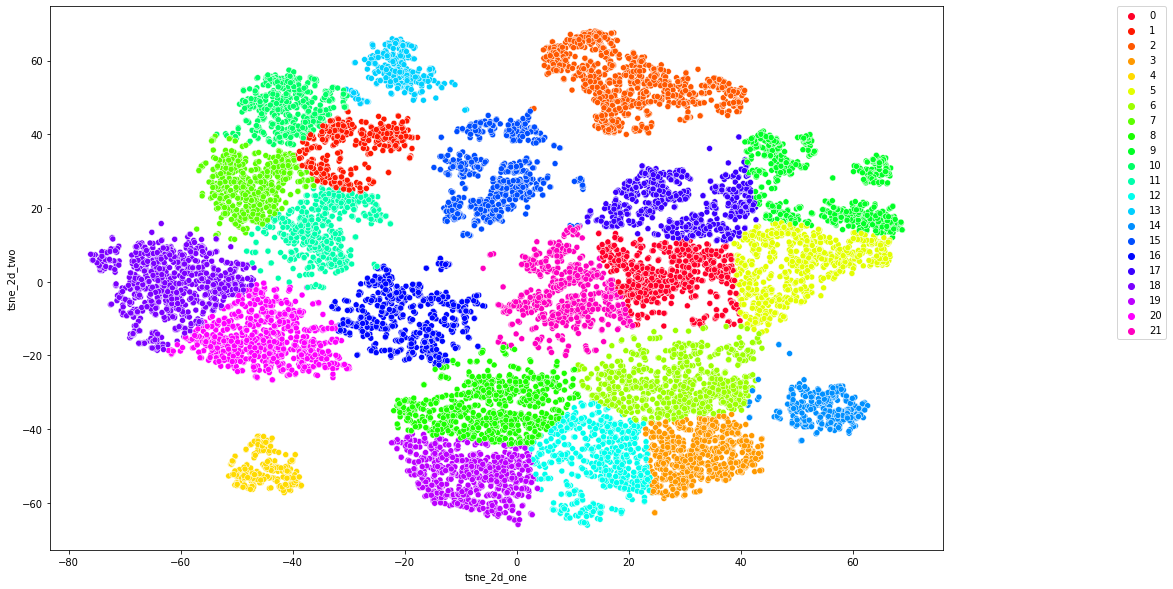

In [14]:
# Create and plot clusters

# Number of centroids
# Optimal number of clusters is 22, according to the Elbow method
K = 22
# The dataset to use
X = df_filtered[['tsne_2d_one', 'tsne_2d_two']]
# Select random observation as a centroid
km = KMeans(n_clusters=K, init='random', n_init=10, max_iter=300, tol=1e-02, random_state=0)
prediction = km.fit_predict(X)
df_filtered['cluster'] = km.labels_

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_2d_one', y='tsne_2d_two',
    hue='cluster',
    palette = 'gist_rainbow',
    # style='name',
    legend='full',
    data=df_filtered
)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

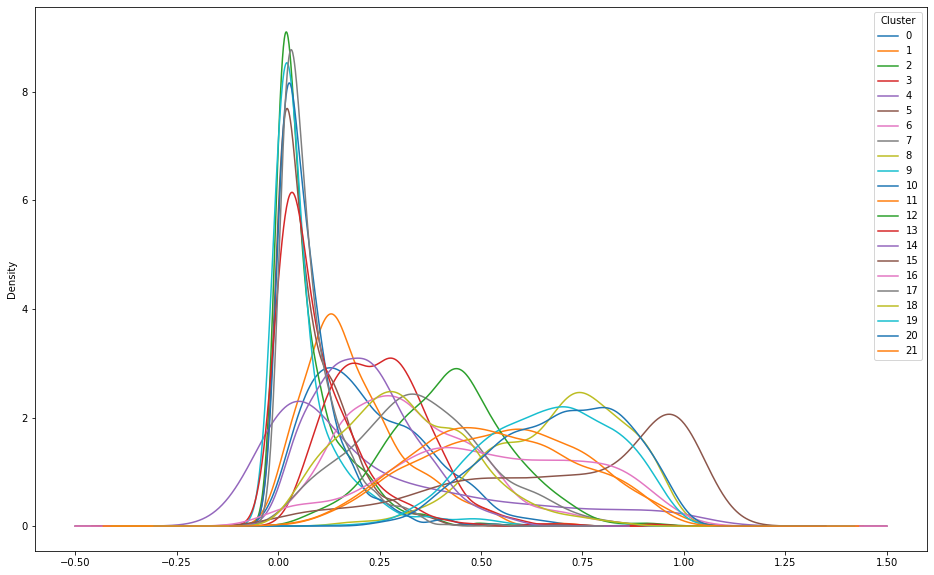

In [15]:
# Plot a density plot for the specified feature for each cluster

feature_col_name = 'energy'

fig, ax = plt.subplots(figsize=(16,10))
for cluster_idx in range(22):
  df_filtered[df_filtered['cluster'] == cluster_idx][feature_col_name].plot(kind="kde", ax=ax, label=cluster_idx)
plt.legend(title='Cluster')

In [16]:
# UMAP

# Filter the playlists if needed and drop duplicates
# df_filtered = df[df['name'].isin(playlists_to_select)]
df_filtered = df.drop_duplicates(subset=['id_x'])
# Uncomment below line to run the dataset without the filters
df_filtered = df

scaler = StandardScaler()
X = scaler.fit_transform(df_filtered[columns_to_select])

reducer = umap.UMAP()

embedding = reducer.fit_transform(X)
print(embedding.shape)




(16268, 2)


In [6]:
lower_dim = pd.DataFrame(embedding, columns=['Feature 1', 'Feature 2'])
# lower_dim['mult'] = (lower_dim['Feature 1'])*(lower_dim['Feature 2'])
# lower_dim['artist'] = (df_filtered['track.artists'])
# rows = embedding.shape[0]
# outlier_data_frame = pd.DataFrame(columns=["track.artists","track.name","name"])

# #embedding[i,1]<-4.5
# #blue island : if(embedding[i,1]>6.5 and embedding[i,1]<9 and embedding[i,0]<11.05):
# for i in range(rows):
#   if(lower_dim.iloc[i, lower_dim.columns.get_loc('artist')] == "Lady Gaga"):
#     lower_dim.iloc[i, lower_dim.columns.get_loc('mult')] = -50
#     outlier_data_frame = outlier_data_frame.append(df.loc[[i],["track.artists","track.name","name"]])

    
# outlier_data_frame.head(100)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


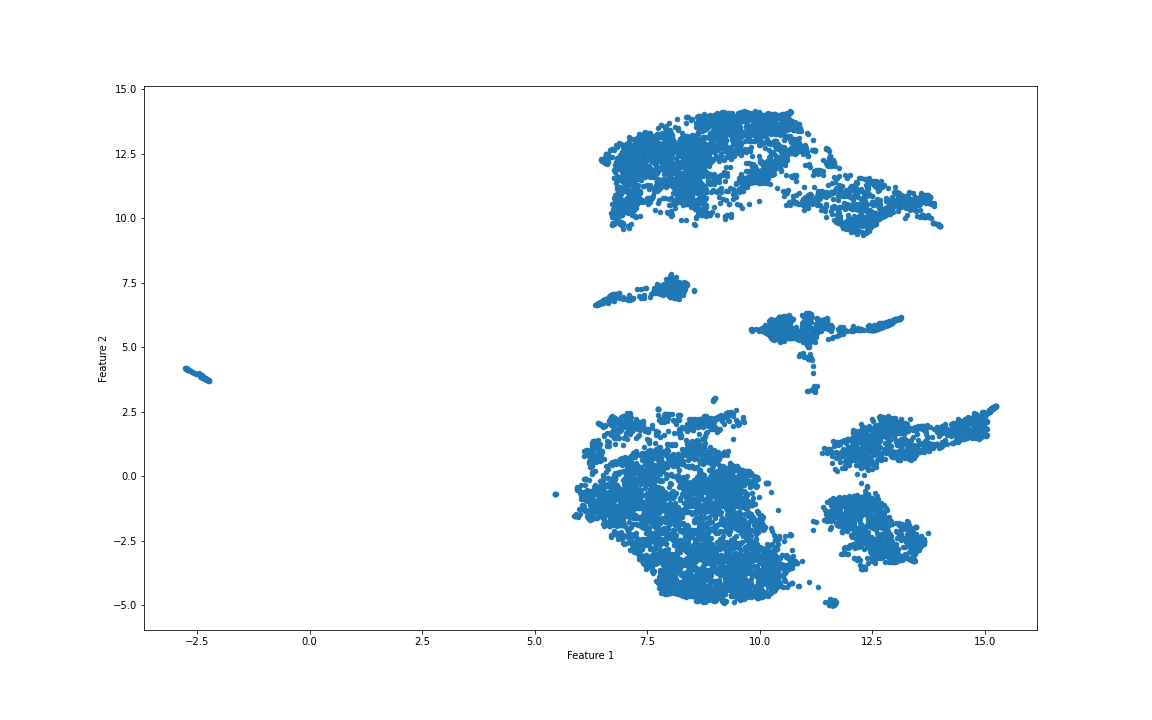

In [7]:
# Transformed dimensions

# plot_umap = lower_dim.plot.scatter(x='Feature 1', y='Feature 2', c='mult', cmap='gist_rainbow', figsize=(20, 12))

%pip install ipympl
%matplotlib widget
plot_umap = lower_dim.plot.scatter(x='Feature 1', y='Feature 2', figsize=(16, 10))

In [68]:
number_of_songs_to_recommend = 100
# song_idx = 685
# britney_features = lower_dim.loc[[song_idx]].values.flatten().tolist()
sample_features = [7.0, 6.0]

lower_dim['distance'] = np.linalg.norm(lower_dim[['Feature 1', 'Feature 2']].sub(sample_features), axis=1)
smallest_distance_indexes = lower_dim[['distance']].apply(lambda x: pd.Series(x.nsmallest(number_of_songs_to_recommend).index))
distance_array = smallest_distance_indexes[['distance']].to_numpy()
distance_array = distance_array.flatten()
df_filtered.loc[distance_array].style.background_gradient(cmap = 'Blues')

,Unnamed: 0,id_x,track.artists,track.name,playlist_id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track.popularity
6236,7700,6SKMkabAEE7AhVu1cimQgs,Young the Giant,In My Home,37i9dQZF1DX2SK4ytI2KAZ,It's ALT Good!,0.358000,0.874000,0,-4.814000,1,0.040800,0.001530,0.000052,0.065300,0.299000,174.009000,219987,3,38.000000
300,432,0hqJxaNkPQ3sPm1tvfPlAe,Jeremy Zucker,Cry with you,37i9dQZF1DWTLSN7iG21yC,Work From Home,0.510000,0.307000,2,-9.921000,1,0.101000,0.321000,0.000002,0.174000,0.356000,159.794000,217044,3,62.000000
8507,10273,2JbPEAf12Ju2CxSIoZC89d,Ultimo,Tutto questo sei tu,37i9dQZF1DXaFm6IhSHlyi,Ballads International,0.452000,0.528000,2,-5.503000,1,0.028800,0.398000,0.000000,0.111000,0.421000,161.647000,244667,3,54.000000
1194,1573,5FmvaZGd6fulojSToozLRD,"HARDY, Lauren Alaina, Devin Dawson",ONE BEER (feat. Lauren Alaina & Devin Dawson),37i9dQZF1DWXLSRKeL7KwM,Energy Booster: Country,0.516000,0.745000,2,-8.352000,1,0.077400,0.564000,0.000000,0.275000,0.826000,186.006000,173173,3,68.000000
4187,5399,6OK7OQyyvNPd2XQIHCB1wz,"ARMNHMR, Bella Renee",Saving Lives,37i9dQZF1DWVrtsSlLKzro,Sad Beats,0.405000,0.646000,0,-4.467000,1,0.030700,0.349000,0.000094,0.339000,0.149000,141.985000,267676,3,48.000000
8452,10218,6sLBJkMyZIkGevtpYgeotT,Ultimo,Piccola Stella,37i9dQZF1DXaFm6IhSHlyi,Ballads International,0.487000,0.465000,2,-8.019000,1,0.047400,0.341000,0.000000,0.111000,0.288000,179.907000,232667,3,61.000000
6992,8553,0hqJxaNkPQ3sPm1tvfPlAe,Jeremy Zucker,Cry with you,37i9dQZF1DX3YSRoSdA634,Life Sucks,0.510000,0.307000,2,-9.921000,1,0.101000,0.321000,0.000002,0.174000,0.356000,159.794000,217044,3,62.000000
5211,6612,32BeYxKPrig1LefHsC0Xuo,Billie Eilish,Happier Than Ever - Edit,37i9dQZF1DX4mWCZw6qYIw,songs to scream in the car,0.334000,0.599000,0,-5.742000,1,0.036500,0.046800,0.000392,0.205000,0.127000,161.740000,151444,3,84.000000
11039,12989,5FmvaZGd6fulojSToozLRD,"HARDY, Lauren Alaina, Devin Dawson",ONE BEER (feat. Lauren Alaina & Devin Dawson),37i9dQZF1DWXi7h4mmmkzD,Country Nights,0.516000,0.745000,2,-8.352000,1,0.077400,0.564000,0.000000,0.275000,0.826000,186.006000,173173,3,68.000000
5057,6401,2Qdnk7tbc4onLOIPd1eSNE,The Cranberries,When You're Gone,37i9dQZF1DWVxpHBekDUXK,Coping With Loss,0.450000,0.525000,3,-6.893000,1,0.027100,0.522000,0.000002,0.254000,0.371000,187.525000,232200,3,64.000000


In [36]:
number_of_songs_to_recommend = 10
song_idx = 685
britney_features = lower_dim.loc[[song_idx]].values.flatten().tolist()

lower_dim['distance'] = np.linalg.norm(lower_dim[['Feature 1', 'Feature 2']].sub(britney_features), axis=1)
smallest_distance_indexes = lower_dim[['distance']].apply(lambda x: pd.Series(x.nsmallest(number_of_songs_to_recommend).index))
distance_array = smallest_distance_indexes[['distance']].to_numpy()
distance_array = distance_array.flatten()
df_filtered.loc[distance_array].style.background_gradient(cmap = 'Blues')

,Unnamed: 0,id_x,track.artists,track.name,playlist_id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track.popularity
685,909,5QhBKPqsnX1uY9fZNaAtZg,Britney Spears,Stronger,37i9dQZF1DX4fpCWaHOned,Confidence Boost,0.707000,0.923000,11,-3.957000,1,0.052100,0.128000,0.000437,0.273000,0.842000,108.049000,203000,4,66.000000
1214,1603,33471tzU1VghDg9zNgGRpz,Old Dominion,Hotel Key,37i9dQZF1DWXLSRKeL7KwM,Energy Booster: Country,0.758000,0.867000,11,-5.087000,1,0.047500,0.152000,0.000000,0.308000,0.964000,102.018000,166573,4,65.000000
10771,12692,6iBWazas8QsDtBnjlXkrXk,Michael Franti & Spearhead,The Sound Of Sunshine,37i9dQZF1DX83I5je4W4rP,Beach Vibes,0.673000,0.902000,10,-4.886000,1,0.055300,0.016400,0.014500,0.269000,0.704000,97.007000,225133,4,59.000000
10862,12786,6iBWazas8QsDtBnjlXkrXk,Michael Franti & Spearhead,The Sound Of Sunshine,37i9dQZF1DWVu0D7Y8cYcs,Just Smile,0.673000,0.902000,10,-4.886000,1,0.055300,0.016400,0.014500,0.269000,0.704000,97.007000,225133,4,59.000000
61,96,0QBzMgT7NIeoCYy3sJCof1,"Camila Cabello, Ed Sheeran",Bam Bam (feat. Ed Sheeran),37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.756000,0.697000,8,-6.377000,1,0.040100,0.182000,0.000000,0.333000,0.956000,94.996000,206071,4,91.000000
1378,1815,4DX82Vc8qAH4jJPvKxvwg6,Junior Senior,Move Your Feet,37i9dQZF1DX1g0iEXLFycr,Feel Good Friday,0.747000,0.904000,9,-2.623000,1,0.080300,0.046000,0.106000,0.203000,0.846000,118.877000,181827,4,67.000000
914,1241,4zP7ADsgJgHGY6VzxbNp1z,Jonas Brothers,Year 3000,37i9dQZF1DX0vHZ8elq0UK,Energy Booster: Pop,0.659000,0.857000,11,-5.850000,1,0.043700,0.004500,0.000002,0.335000,0.798000,106.965000,201960,4,65.000000
1231,1622,2KKijf6Ett4kmVNJze2roh,Blanco Brown,The Git Up,37i9dQZF1DWXLSRKeL7KwM,Energy Booster: Country,0.847000,0.678000,9,-8.635000,1,0.109000,0.066900,0.000000,0.274000,0.811000,97.984000,200594,4,70.000000
1433,1870,1gihuPhrLraKYrJMAEONyc,Calvin Harris,Feel So Close - Radio Edit,37i9dQZF1DX1g0iEXLFycr,Feel Good Friday,0.707000,0.924000,7,-2.842000,1,0.031000,0.000972,0.007030,0.204000,0.919000,127.937000,206413,4,80.000000
2055,2634,4w7aLWzTe5FmvHSbuunVsl,"Martin Jensen, Bjørnskov",Somebody I'm Not,37i9dQZF1DX0UrRvztWcAU,Wake Up Happy,0.730000,0.728000,9,-5.414000,1,0.045700,0.198000,0.000000,0.271000,0.775000,100.009000,167627,4,42.000000


In [ ]:
rows = embedding.shape[0]
outlier_data_frame = pd.DataFrame(columns=["track.artists","track.name","name"])
for i in range(rows):
  if(embedding[i,0]<0):
    outlier_data_frame = outlier_data_frame.append(df.loc[[i],["track.artists","track.name","name"]])
    
outlier_data_frame.head(100)

,track.artists,track.name,name
82,Vance Joy,Mess Is Mine,Happy Folk
126,"Beoga, Lissie",In a Rocket,Happy Folk
1015,Nessa Barrett,dying on the inside,young & free
1557,Peter Gabriel,Solsbury Hill,Have a Great Day!
1697,Frank Ocean,Dear April (Side A - Acoustic),Music for a Workday
...,...,...,...
10917,Eddie Harper,Danny´s Dream,Rainy Day Jazz
10924,Geeder,I ́ll Be Seing You,Rainy Day Jazz
11120,Gaby Moreno,Illusion,Café con Leche
11138,Las Hermanas García,Tu Voz,Café con Leche


In [ ]:
# Meant to be run when the full dataset has been used with UMAP
rows = embedding.shape[0]
outlier_data_frame2 = pd.DataFrame(columns=["track.artists","track.name","name"])
for i in range(rows):
  if (embedding[i,0]>11 and embedding[i,0]<12.5 and embedding[i,1]>2.5 and embedding[i,1]<4):
    outlier_data_frame2 = outlier_data_frame2.append(df.loc[[i],["track.artists","track.name","name"]])
    
outlier_data_frame2.head(100)

,track.artists,track.name,name
8547,"Loop Schrauber, 3pmbeatz",Space Maneuvers,Jazz Vibes
8622,rocomoco,Warm Flicker,Jazz Vibes
8662,Made in M,Vela,Jazz Vibes
8666,"Grmmr.126, Mvdk",Nina,Jazz Vibes
8725,"SamuW, Nofeels, Styn",Stellar,Jazz Vibes
8745,"Pixie Dust, Golden Ticket Tapes",Twilight,Jazz Vibes
8778,Iassu,Sweet Sunset,Jazz Vibes
8784,"SamuW, Mendeville, Nofeels",Pink Hair,Jazz Vibes
8818,lorleaf,Stena,Jazz Vibes
8843,Vice Bertha,Trippy,Feel Good Beats


Optimal number of clusters 22


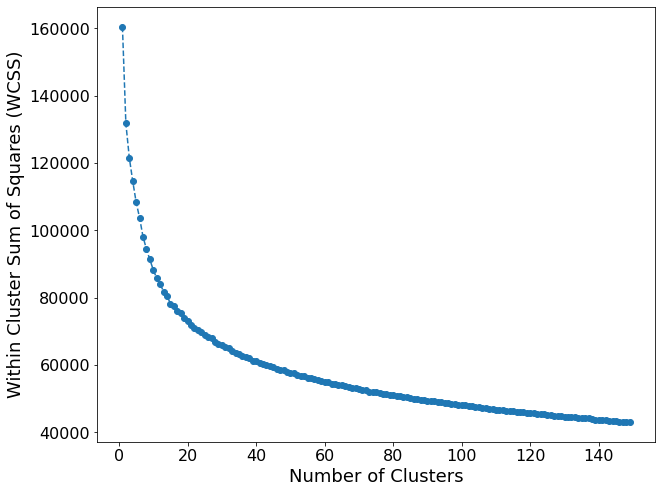

In [ ]:
# Elbow method to figure out the optimal cluster count

# From: https://towardsdatascience.com/k-means-clustering-and-pca-to-categorize-music-by-similar-audio-features-df09c93e8b64

# Filter the playlists if needed and drop duplicates
# df_filtered = df[df['name'].isin(playlists_to_select)]
# df_filtered = df.drop_duplicates(subset=['id_x'])
# Uncomment below line to run the dataset without the filters
df_filtered = df

scaler = StandardScaler()
X = scaler.fit_transform(df_filtered[columns_to_select])

# Get within cluster sum of squares for each value of k
wcss = []
max_clusters = 150
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(X)
    wcss.append(kmeans_pca.inertia_)
      
# Programmatically locate the elbow
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)
    
# Visualize the curve in order to locate the elbow
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, max_clusters), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()